In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_columns',90)
data1 = pd.read_csv(r'C:\Users\ASUS\Downloads\Life Expectancy Data.csv')
data2 = pd.read_excel(r'C:\Users\ASUS\Downloads\default of credit card clients.xls')

## Preprocessing of 1st dataset

In [3]:
data1.describe(include='all')

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,2938,2938.000000,2938,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2928.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,69.224932
std,NaN,4.613841,NaN,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,9.523867
min,NaN,2000.000000,NaN,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,NaN,2004.000000,NaN,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,63.100000
50%,NaN,2008.000000,NaN,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,72.100000
75%,NaN,2012.000000,NaN,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,75.700000


In [4]:
data1.isnull().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
dtype: int64

In [5]:
def function (data1):
    for column in data1.columns:
        if data1[column].isnull().sum() > 0:
            if pd.api.types.is_numeric_dtype(data1[column]):
               
                data1[column].fillna(data1[column].mean(), inplace=True)
            else:
              
                data1[column].fillna(data1[column].mode()[0], inplace=True)

In [6]:
function (data1)

In [7]:
data1.columns = data1.columns.str.strip()

In [8]:
data1.isnull().sum()

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
dtype: int64

In [9]:
data1.corr()['Life expectancy']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16632\3958759018.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()['Life expectancy']


Year                               0.169623
Adult Mortality                   -0.696359
infant deaths                     -0.196535
Alcohol                            0.391598
percentage expenditure             0.381791
Hepatitis B                        0.203771
Measles                           -0.157574
BMI                                0.559255
under-five deaths                 -0.222503
Polio                              0.461574
Total expenditure                  0.207981
Diphtheria                         0.475418
HIV/AIDS                          -0.556457
GDP                                0.430493
Population                        -0.019638
thinness  1-19 years              -0.472162
thinness 5-9 years                -0.466629
Income composition of resources    0.692483
Schooling                          0.715066
Life expectancy                    1.000000
Name: Life expectancy, dtype: float64

In [10]:
avarage_corr=abs(data1.corr()['Life expectancy']).mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16632\2968012118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  avarage_corr=abs(data1.corr()['Life expectancy']).mean()


In [11]:
avarage_corr

0.4238455278454515

In [12]:
dropped_columns = []

for i in data1[['Year', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy']]:
    
    if abs(data1.corr()['Life expectancy'][i])<avarage_corr:
        dropped_columns.append(i)
    
data1.drop(dropped_columns, axis=1, inplace=True)  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16632\2699406809.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  if abs(data1.corr()['Life expectancy'][i])<avarage_corr:


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data1 [[
    'Adult Mortality', 
    'BMI', 
#     'Polio', 
#     'Diphtheria',  
    'HIV/AIDS', 
    'GDP', 
    'thinness  1-19 years', 
#     'thinness 5-9 years',
#     'Income composition of resources', 
#     'Schooling'
]]

vif=pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,3.268823,Adult Mortality
1,2.258936,BMI
2,1.534466,HIV/AIDS
3,1.455820,GDP
4,2.059206,thinness 1-19 years


In [14]:
data1.drop(['Polio', 'Diphtheria', 'thinness 5-9 years', 'Income composition of resources', 'Schooling'], axis=1, inplace=True)

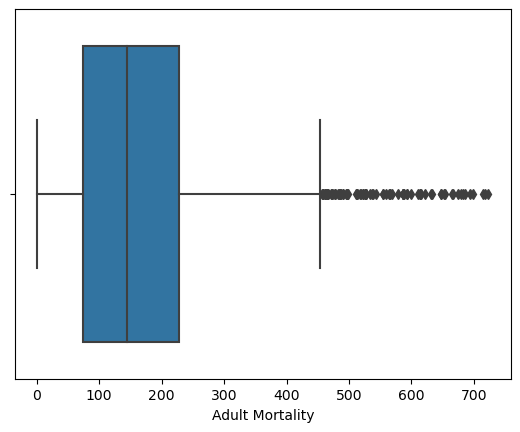

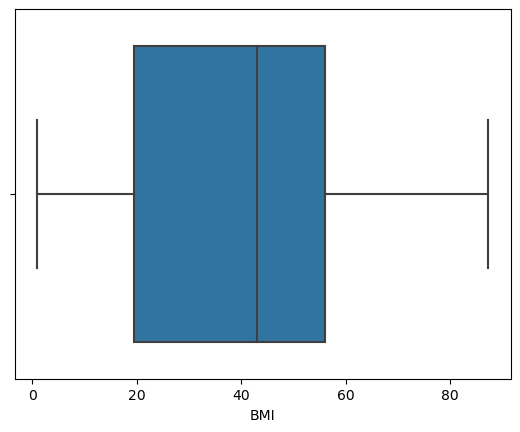

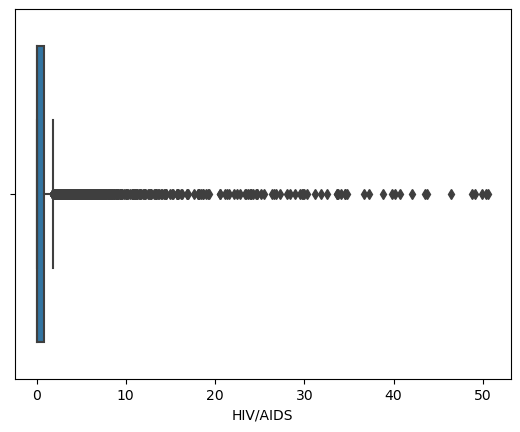

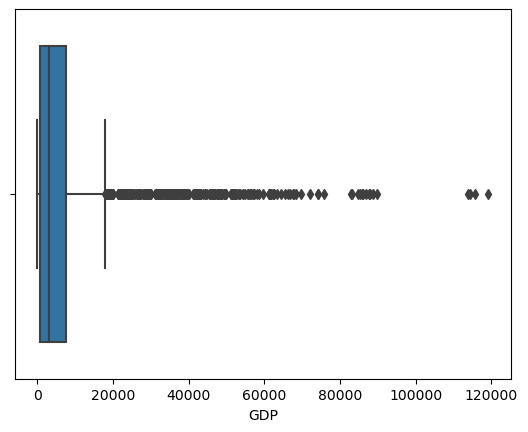

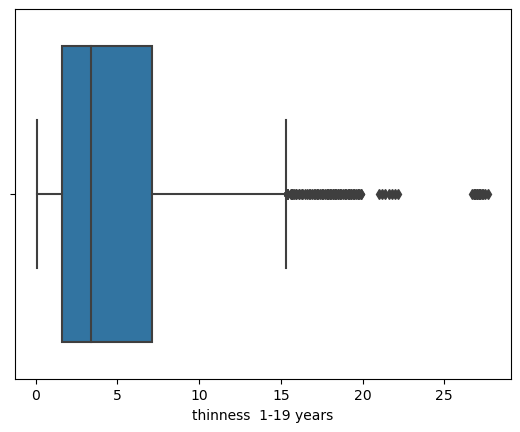

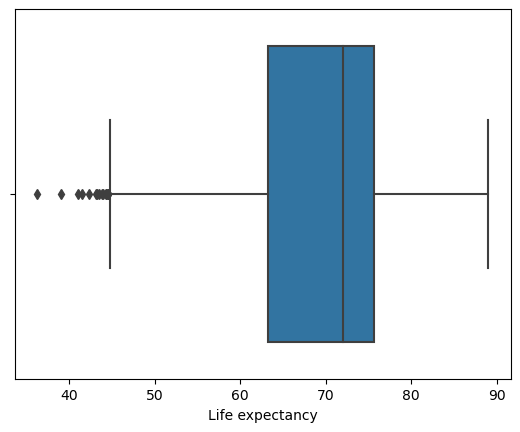

In [15]:
for i in data1[['Adult Mortality', 'BMI', 'HIV/AIDS', 'GDP',
       'thinness  1-19 years', 'Life expectancy']]:
    
    sns.boxplot(x=data1[i], data=data1)
    plt.show()

In [16]:
q1=data1.quantile(0.25)
q3=data1.quantile(0.75)
IQR=q3-q1
Lower=q1-1.5*IQR
Upper=q3+1.5*IQR

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16632\2217043237.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=data1.quantile(0.25)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16632\2217043237.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=data1.quantile(0.75)


In [17]:
for i in data1[['Adult Mortality', 'BMI', 'HIV/AIDS', 'GDP',
       'thinness  1-19 years', 'Life expectancy']]:
    
    data1[i] = np.where(data1[i] > Upper[i], Upper[i], data1[i])
    data1[i] = np.where(data1[i] < Lower[i], Lower[i], data1[i])

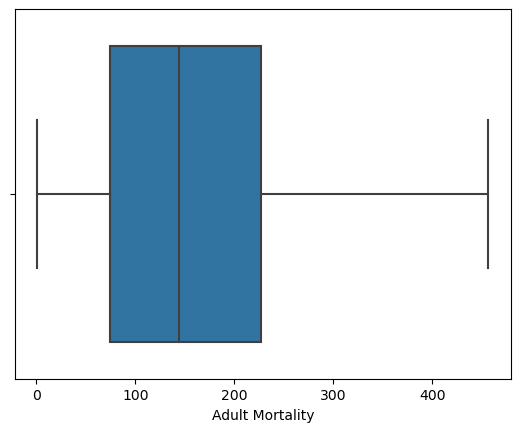

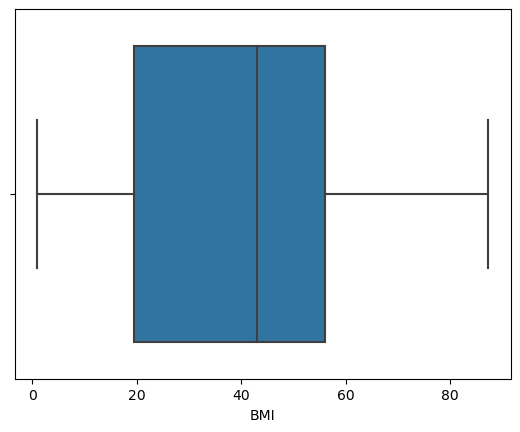

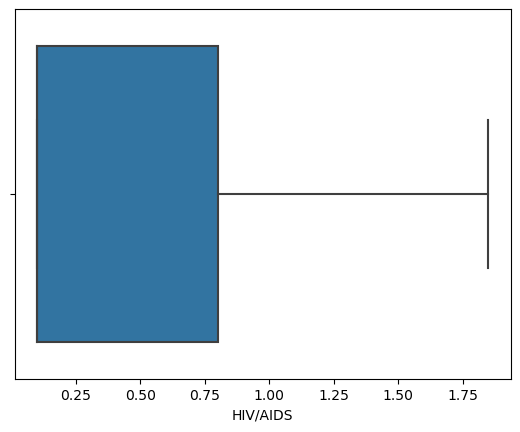

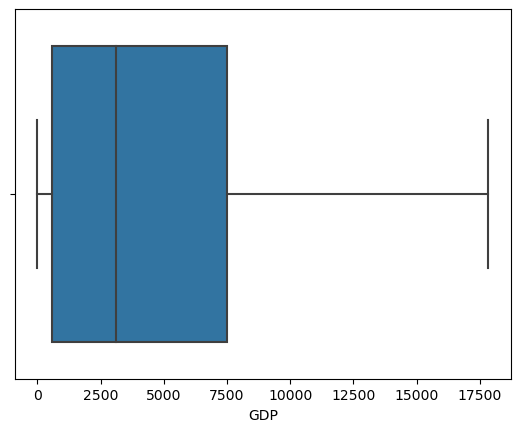

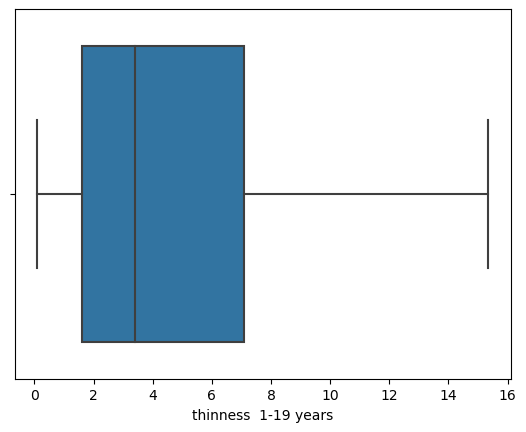

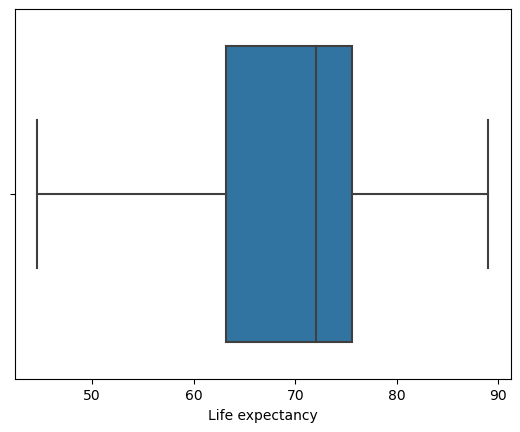

In [18]:
for i in data1[['Adult Mortality', 'BMI', 'HIV/AIDS', 'GDP',
       'thinness  1-19 years', 'Life expectancy']]:
    
    sns.boxplot(x=data1[i], data=data1)
    plt.show()

In [19]:
data1 = data1.reset_index(drop=True)

In [20]:
data1 = data1.drop('Country', axis=1)

In [21]:
data1 = pd.get_dummies(data1, drop_first=True)

In [22]:
data1_s = StandardScaler().fit_transform(data1)

In [23]:
data1 = pd.DataFrame(data1_s, columns=data1.columns)
data1

,Adult Mortality,BMI,HIV/AIDS,GDP,thinness 1-19 years,Life expectancy,Status_Developing
0,0.874521,-0.964715,-0.629209,-0.814796,2.708884,-0.446803,0.459399
1,0.943807,-0.989810,-0.629209,-0.809714,2.708884,-0.984892,0.459399
2,0.917824,-1.014905,-0.629209,-0.806310,2.708884,-0.984892,0.459399
3,0.952467,-1.040000,-0.629209,-0.799482,2.708884,-1.027095,0.459399
4,0.978449,-1.060076,-0.629209,-0.907849,2.708884,-1.058747,0.459399
...,...,...,...,...,...,...,...
2933,2.550365,-0.563194,1.895041,-0.838008,1.194717,-2.599157,0.459399
2934,2.550365,-0.583270,1.895041,-0.838190,1.296510,-2.599157,0.459399
2935,-0.771011,-0.603346,1.895041,-0.908955,-0.892033,-2.578055,0.459399
2936,2.550365,-0.623422,1.895041,-0.821171,-0.790240,-2.525301,0.459399


## Preprocessing of 2nd dataset

In [24]:
data2.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,2,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18112,14030,15964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,167484.322667,NaN,NaN,NaN,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,NaN,NaN,NaN,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


In [25]:
data2.drop('ID', axis=1, inplace=True)

In [26]:
data2.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [27]:
data2.corr()['default']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16632\3472946860.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.corr()['default']


LIMIT_BAL   -0.153520
AGE          0.013890
PAY_0        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
BILL_AMT1   -0.019644
BILL_AMT2   -0.014193
BILL_AMT3   -0.014076
BILL_AMT4   -0.010156
BILL_AMT5   -0.006760
BILL_AMT6   -0.005372
PAY_AMT1    -0.072929
PAY_AMT2    -0.058579
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT5    -0.055124
PAY_AMT6    -0.053183
default      1.000000
Name: default, dtype: float64

In [28]:
avarage_corr=data2.corr()['default'].mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16632\3743941619.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  avarage_corr=data2.corr()['default'].mean()


In [29]:
avarage_corr

0.08897625257401605

In [30]:
dropped_columns = []

for i in data2[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']]:
    
    if abs(data2.corr()['default'][i]) < avarage_corr:
        dropped_columns.append(i)
    
data2.drop(dropped_columns, axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16632\1113915562.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  if abs(data2.corr()['default'][i]) < avarage_corr:


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data2 [[
    'LIMIT_BAL', 
    'PAY_0', 
    'PAY_2', 
    'PAY_3',
    'PAY_4', 
    'PAY_5', 
    'PAY_6'
]]

vif=pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,1.145291,LIMIT_BAL
1,1.866151,PAY_0
2,3.119746,PAY_2
3,3.633879,PAY_3
4,4.341370,PAY_4
5,4.845040,PAY_5
6,3.313283,PAY_6


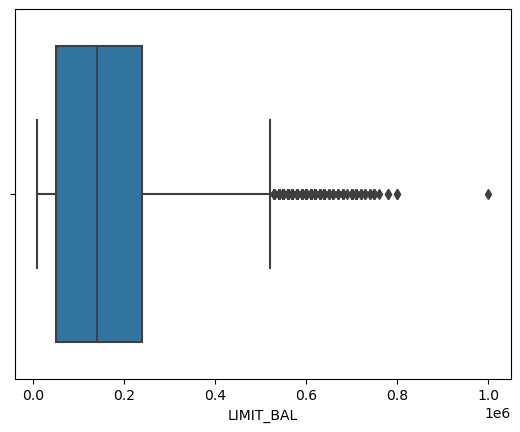

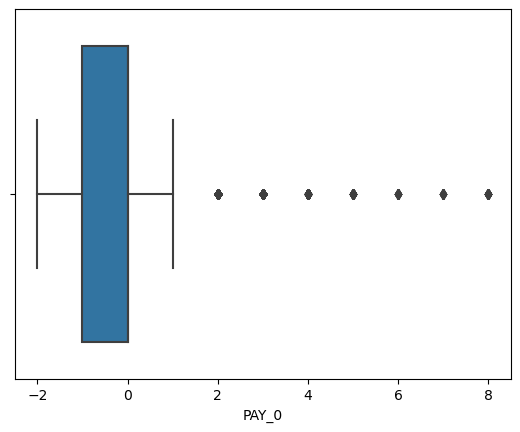

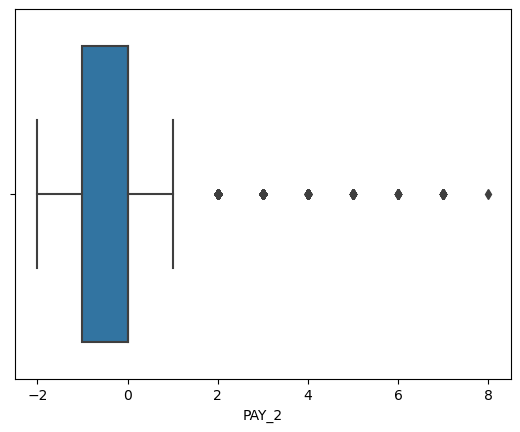

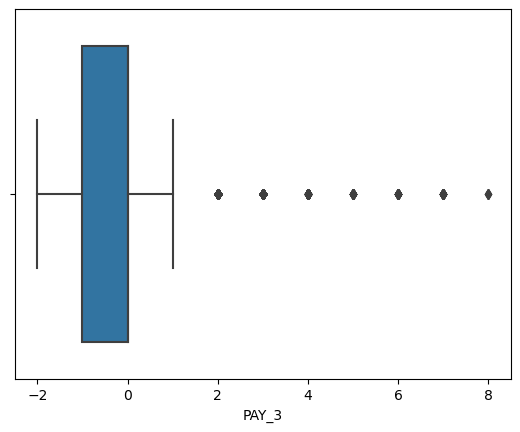

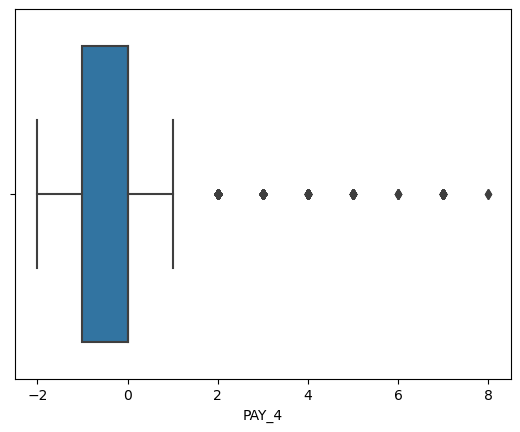

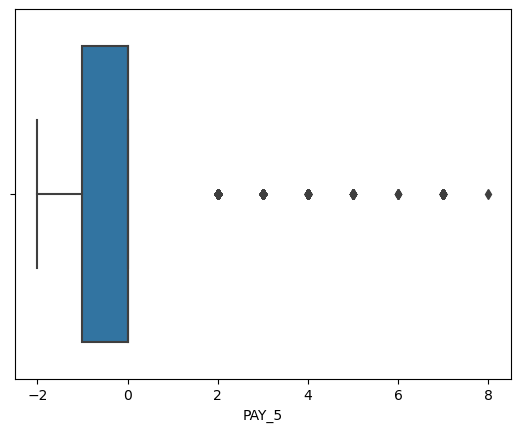

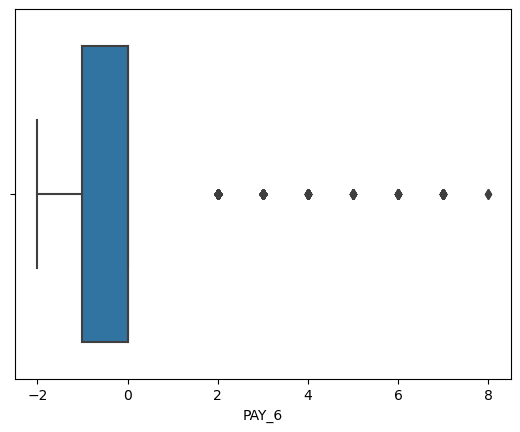

In [32]:
for i in data2[[
    'LIMIT_BAL', 
    'PAY_0', 
    'PAY_2', 
    'PAY_3',
    'PAY_4', 
    'PAY_5', 
    'PAY_6']]:
    
    sns.boxplot(x=data2[i], data=data2)
    plt.show()

In [33]:
q1=data2.quantile(0.25)
q3=data2.quantile(0.75)
IQR=q3-q1
Lower=q1-1.5*IQR
Upper=q3+1.5*IQR

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16632\1241704132.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=data2.quantile(0.25)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16632\1241704132.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=data2.quantile(0.75)


In [34]:
for i in data2[[
    'LIMIT_BAL', 
    'PAY_0', 
    'PAY_2', 
    'PAY_3',
    'PAY_4', 
    'PAY_5', 
    'PAY_6']]:
    
    
    data2[i] = np.where(data2[i] > Upper[i], Upper[i], data2[i])
    data2[i] = np.where(data2[i] < Lower[i], Lower[i], data2[i])

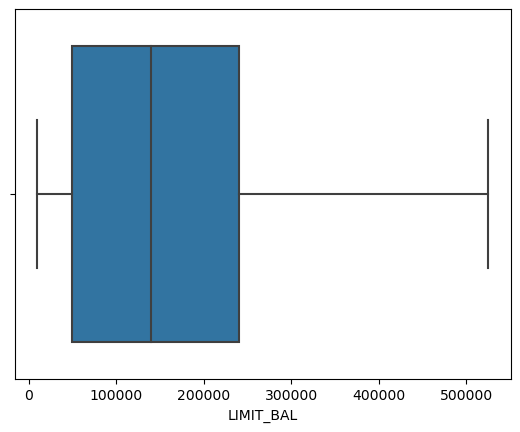

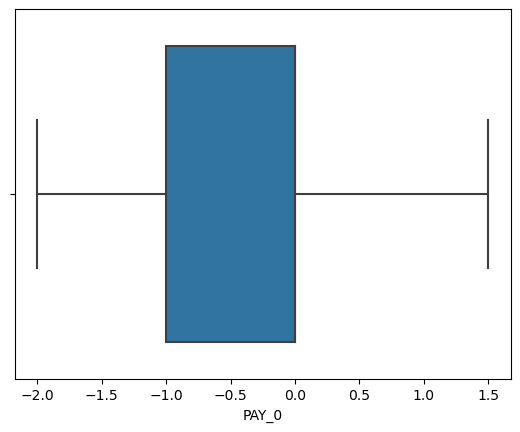

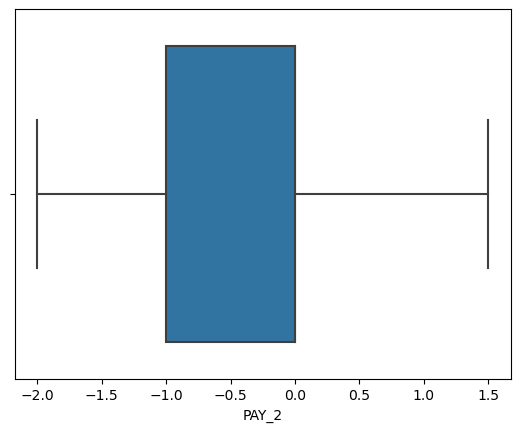

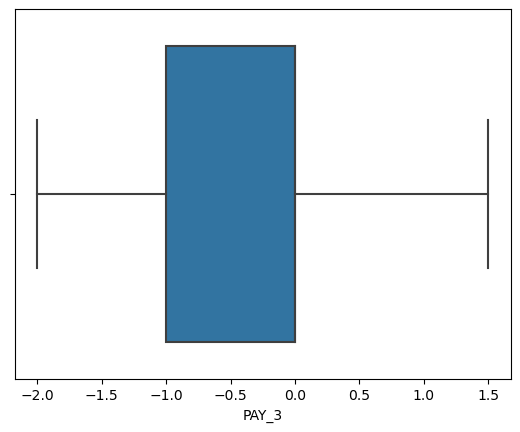

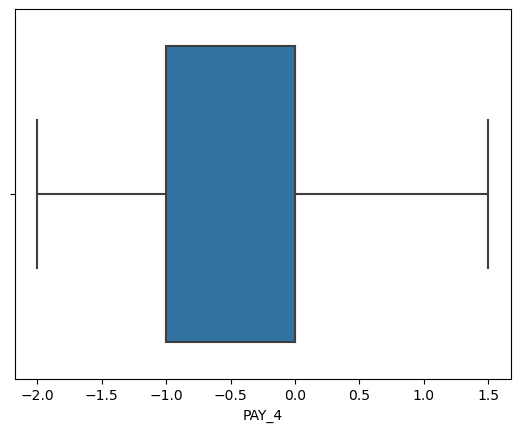

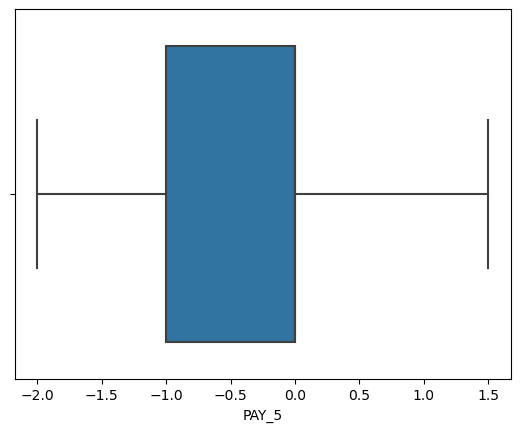

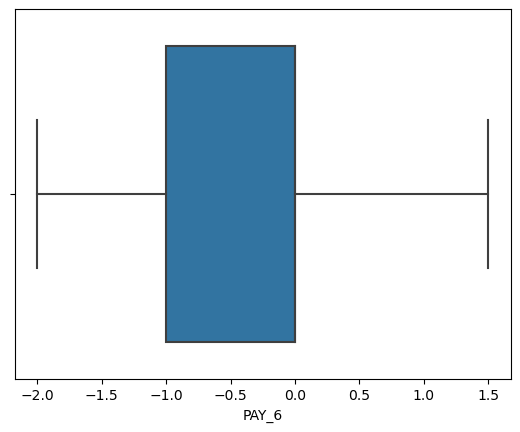

In [35]:
for i in data2[[
    'LIMIT_BAL', 
    'PAY_0', 
    'PAY_2', 
    'PAY_3',
    'PAY_4', 
    'PAY_5', 
    'PAY_6']]:
    
    sns.boxplot(x=data2[i], data=data2)
    plt.show()

In [36]:
data2 = data2.reset_index(drop=True)

In [37]:
data2 = pd.get_dummies(data2, drop_first=True)

In [38]:
data2_s = StandardScaler().fit_transform(data2)

In [39]:
data2 = pd.DataFrame(data2_s, columns=data2.columns)
data2

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_male,EDUCATION_high school,EDUCATION_not educated,EDUCATION_others,EDUCATION_university,MARRIAGE_others,MARRIAGE_single
0,-1.148083,1.674463,1.746729,-0.743681,-0.717876,-1.752244,-1.685337,1.876378,-0.810161,-0.442752,-0.021608,-0.123959,1.066900,-0.112812,-1.066471
1,-0.366901,-0.951679,1.746729,0.260863,0.313506,0.358003,1.919588,1.876378,-0.810161,-0.442752,-0.021608,-0.123959,1.066900,-0.112812,0.937672
2,-0.601256,0.098778,0.234293,0.260863,0.313506,0.358003,0.374620,-0.532942,-0.810161,-0.442752,-0.021608,-0.123959,1.066900,-0.112812,0.937672
3,-0.913728,0.098778,0.234293,0.260863,0.313506,0.358003,0.374620,-0.532942,-0.810161,-0.442752,-0.021608,-0.123959,1.066900,-0.112812,-1.066471
4,-0.913728,-0.951679,0.234293,-0.743681,0.313506,0.358003,0.374620,-0.532942,1.234323,-0.442752,-0.021608,-0.123959,1.066900,-0.112812,-1.066471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.414280,0.098778,0.234293,0.260863,0.313506,0.358003,0.374620,-0.532942,1.234323,2.258602,-0.021608,-0.123959,-0.937295,-0.112812,-1.066471
29996,-0.132547,-0.951679,-0.773998,-0.743681,-0.717876,0.358003,0.374620,-0.532942,1.234323,2.258602,-0.021608,-0.123959,-0.937295,-0.112812,0.937672
29997,-1.069964,1.674463,1.746729,1.767680,-0.717876,0.358003,0.374620,1.876378,1.234323,-0.442752,-0.021608,-0.123959,1.066900,-0.112812,0.937672
29998,-0.679374,1.149235,-0.773998,0.260863,0.313506,0.358003,-0.655358,1.876378,1.234323,2.258602,-0.021608,-0.123959,-0.937295,-0.112812,-1.066471


## PCA Implementation

In [40]:
data1

,Adult Mortality,BMI,HIV/AIDS,GDP,thinness 1-19 years,Life expectancy,Status_Developing
0,0.874521,-0.964715,-0.629209,-0.814796,2.708884,-0.446803,0.459399
1,0.943807,-0.989810,-0.629209,-0.809714,2.708884,-0.984892,0.459399
2,0.917824,-1.014905,-0.629209,-0.806310,2.708884,-0.984892,0.459399
3,0.952467,-1.040000,-0.629209,-0.799482,2.708884,-1.027095,0.459399
4,0.978449,-1.060076,-0.629209,-0.907849,2.708884,-1.058747,0.459399
...,...,...,...,...,...,...,...
2933,2.550365,-0.563194,1.895041,-0.838008,1.194717,-2.599157,0.459399
2934,2.550365,-0.583270,1.895041,-0.838190,1.296510,-2.599157,0.459399
2935,-0.771011,-0.603346,1.895041,-0.908955,-0.892033,-2.578055,0.459399
2936,2.550365,-0.623422,1.895041,-0.821171,-0.790240,-2.525301,0.459399


In [41]:
X = data1.values
n_components = 2
pca_data1 = PCA(n_components = n_components)
principal_components_1 = pca_data1.fit_transform(X)

In [42]:
pc_df_1 = pd.DataFrame(principal_components_1, columns = ['PCA1', 'PCA2'])
pc_df_1

,PCA1,PCA2
0,2.007883,-1.208743
1,2.296000,-1.076182
2,2.294299,-1.085606
3,2.334585,-1.061009
4,2.401636,-1.095478
...,...,...
2933,4.017358,1.403795
2934,4.060720,1.376839
2935,2.041001,0.573112
2936,3.300418,1.911177


In [43]:
final_df_1 = pd.concat([pc_df_1, data1], axis=1)

In [44]:
final_df_1

,PCA1,PCA2,Adult Mortality,BMI,HIV/AIDS,GDP,thinness 1-19 years,Life expectancy,Status_Developing
0,2.007883,-1.208743,0.874521,-0.964715,-0.629209,-0.814796,2.708884,-0.446803,0.459399
1,2.296000,-1.076182,0.943807,-0.989810,-0.629209,-0.809714,2.708884,-0.984892,0.459399
2,2.294299,-1.085606,0.917824,-1.014905,-0.629209,-0.806310,2.708884,-0.984892,0.459399
3,2.334585,-1.061009,0.952467,-1.040000,-0.629209,-0.799482,2.708884,-1.027095,0.459399
4,2.401636,-1.095478,0.978449,-1.060076,-0.629209,-0.907849,2.708884,-1.058747,0.459399
...,...,...,...,...,...,...,...,...,...
2933,4.017358,1.403795,2.550365,-0.563194,1.895041,-0.838008,1.194717,-2.599157,0.459399
2934,4.060720,1.376839,2.550365,-0.583270,1.895041,-0.838190,1.296510,-2.599157,0.459399
2935,2.041001,0.573112,-0.771011,-0.603346,1.895041,-0.908955,-0.892033,-2.578055,0.459399
2936,3.300418,1.911177,2.550365,-0.623422,1.895041,-0.821171,-0.790240,-2.525301,0.459399


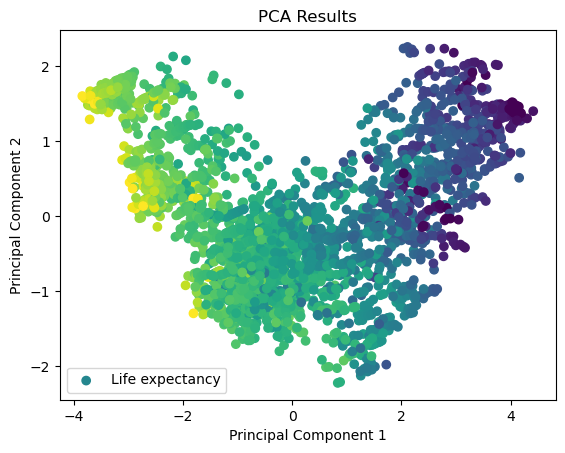

In [45]:
plt.scatter(final_df_1['PCA1'], final_df_1['PCA2'], c=final_df_1['Life expectancy'], cmap='viridis', label='Life expectancy')
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

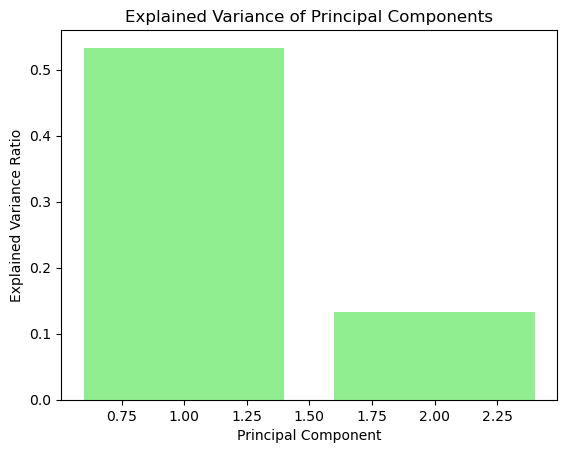

In [46]:
plt.bar(range(1, n_components + 1), pca_data1.explained_variance_ratio_, color='lightgreen')
plt.title('Explained Variance of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

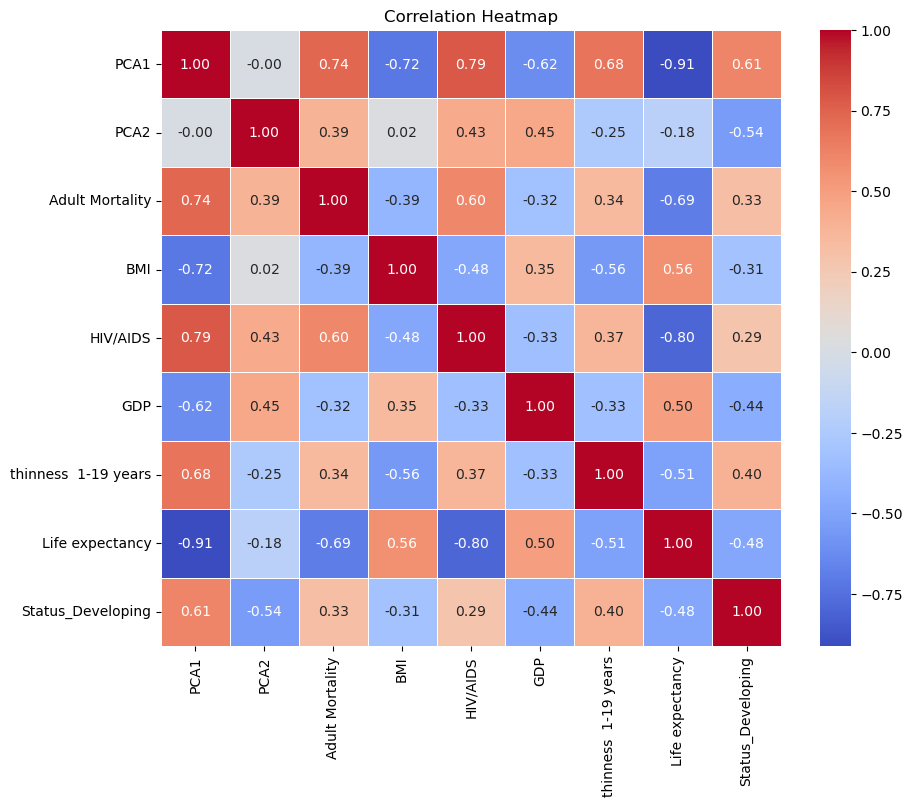

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(final_df_1.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()